## Object Detection 

### Introduction:


When it comes to deep learning-based object detection, there are three primary object detectors you’ll encounter:

    1. R-CNN and their variants, including the original R-CNN, Fast R- CNN, and Faster R-CNN
    2. Single Shot Detector (SSDs)
    3. YOLO (You Only Look Once)
    
While R-CNNs tend to very accurate, the biggest problem with the R-CNN family of networks is their speed — they were incredibly slow, obtaining only 5 FPS on a GPU.

To help increase the speed of deep learning-based object detectors, both Single Shot Detectors (SSDs) and YOLO use a one-stage detector strategy.

These algorithms treat object detection as a regression problem, taking a given input image and simultaneously learning bounding box coordinates and corresponding class label probabilities.

In general, single-stage detectors tend to be less accurate than two-stage detectors but are significantly faster.

YOLO is a great example of a single stage detector.
 
A YOLO object detector is capable of super real-time object detection, obtaining 45 FPS on a GPU. Fast YOLO claims to achieve 155.

The YOLOv3 is recent and significantly larger than previous models, the best one yet out of the YOLO family of object detectors.

### Load required packages

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Load yolov3 weights, yolov3 config and coco.names file

To apply YOLO algorithm, you need to load three files,

    1. weights file: It's the trained model, the core of algorithm for detection.
    2. cfg file: Load the COCO class labels YOLO model was trained on.
    3. names file: Contains name of the objects that the algorithm can detect.


In [2]:
weights = 'F:\Python\yolov3.weights'
cfg = 'F:\Python\yolov3.cfg'
names = 'F:\Python\coco.names'

### Load and print image class names from the names file

In [3]:
classes = []
with open(names, "r") as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

#load our YOLO object detector trained on COCO dataset (80 classes)
net = cv2.dnn.readNet(weights, cfg)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


### Load input image file

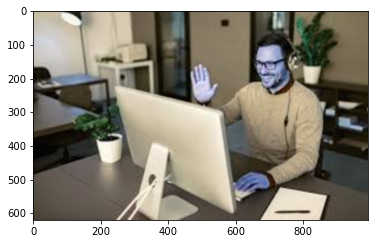

In [4]:
IMAGE = 'F:\Python\Sampleimage_8.jpg'
img = cv2.imread(IMAGE)
img = cv2.resize(img, None, fx = 3.5, fy = 3.5)
#cv2.imshow("Image", img)
height, width, channels = img.shape
plt.imshow(img)
plt.show()


### Detect object in image using blob

In this block,

1. Determine only the output_layers names that we need from YOLO 
2. Construct a blob from the input image and then perform a forward pass of the YOLO object detector, giving us our        bounding boxes and associated probabilities
    

In [5]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

colors = np.random.uniform(0, 255, size = (len(classes), 2))

blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop = False)
#Print the blobs detected
net.setInput(blob)
outs = net.forward(output_layers)
#print(outs)


### Show number of objects detected and populate lists boxes, confidences and class_ids for YOLO


1. boxes: Our bounding boxes around the object.
2. confidences : The confidence value that YOLO assigns to an object. Lower confidence values indicate that the                          object might not be what the network thinks it is. Remember from our command line arguments above                      that we’ll filter out objects that don’t meet the 0.5 threshold.
3. class_ids: The detected object’s class label.

Print out the number of objects detected from the input image


In [6]:
#Showing informations on the screen
confidences = list()
boxes = list()
class_ids = list()

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        
        if confidence > 0.3:
            
            #Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            #Rectangle Coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append((float(confidence)))
            class_ids.append(class_id)

            #cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            #cv2.circle(img, (center_x, center_y), 10, (0, 0, 255), 2)

number_objects_detected = len(boxes)
print("Total number of objects detected is:", len(boxes))


Total number of objects detected is: 7


### Apply non-max suppression(NMS) and Show the labels of objects detected



Applying non-maxima suppression suppresses significantly overlapping bounding boxes, keeping only the most confident ones.

NMS also ensures that we do not have any redundant or extraneous bounding boxes.

In [7]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print("Indices after non-max suppression are:", indexes, sep = "\n")
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        print("Labels of the Object detected is:", label)
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), cv2.FONT_HERSHEY_PLAIN, 3, color, 3)


Indices after non-max suppression are:
[[1]
 [2]
 [4]
 [0]
 [6]]
Labels of the Object detected is: refrigerator
Labels of the Object detected is: person
Labels of the Object detected is: laptop
Labels of the Object detected is: pottedplant
Labels of the Object detected is: pottedplant


### Display result

Here, we simply draw the bounding box and text on image using random class colors and finally diaplay resulting image.

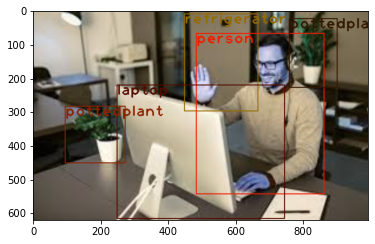

In [8]:
cv2.imshow("image", img)
plt.imshow(img)
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()
